In [19]:
import pandas as pd
import numpy as np

# Import Libraries

In [20]:
df = pd.read_csv("data/Ghana_Covid19_DailyActive.csv")

# Data Scan

##### display first row rows of dataset

In [21]:
df.head(5)

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
0,2,0,0,03/12/2020,2,0,0,2
1,2,0,0,03/13/2020,4,0,0,4
2,2,0,0,03/14/2020,6,0,0,6
3,1,0,0,03/17/2020,7,0,0,7
4,2,0,0,03/18/2020,9,0,0,9


##### display randomly selected rows from datatset

In [22]:
df.sample(5)

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases
85,311,463,9,06/26/2020,16742,12720,112,3910
127,168,265,8,08/09/2020,41572,39320,223,2029
222,86,178,0,11/17/2020,50717,49281,323,1113
133,121,205,8,08/15/2020,42653,40567,239,1847
80,414,434,10,06/21/2020,14568,10907,95,3566


##### return the number of rows and columns in the datatset

In [23]:
df.shape

(233, 8)

##### return information on dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   confirmed              233 non-null    int64 
 1   recovered              233 non-null    int64 
 2   death                  233 non-null    int64 
 3   date                   233 non-null    object
 4   cumulative_confirmed   233 non-null    int64 
 5   cumulative_recovered   233 non-null    int64 
 6   cumulative_death       233 non-null    int64 
 7   active_cases           233 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 14.7+ KB


return datatypes for each column

In [25]:
df.dtypes

confirmed                 int64
recovered                 int64
death                     int64
date                     object
cumulative_confirmed      int64
cumulative_recovered      int64
cumulative_death          int64
active_cases              int64
dtype: object

# Data Cleaning

#### missing data

In [26]:
df.isnull().sum()

confirmed                0
recovered                0
death                    0
date                     0
cumulative_confirmed     0
cumulative_recovered     0
cumulative_death         0
active_cases             0
dtype: int64

#### correct or dtypes for date column to date datatype

In [27]:
# Convert the date column to date format
df["date"] = pd.to_datetime(df["date"])

# Data analysis and visualization

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

## Analysis

#### lets begin by extracting the month and year from the date column

In [59]:
df["year"] = df["date"].dt.year

let's check that this data was recorded in 

In [60]:
df["year"].unique()

array([2020], dtype=int32)

as seen, this data is for just 2020 and as such we can discard the year column

In [61]:
df.drop(columns=["year"], inplace=True)

next, lets do the same steps for the month

In [62]:
df["month"] = df["date"].dt.month_name()

lets define the month order so as to reset it whenever a code reorders it

In [74]:
# Define the correct chronological month order
month_order = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 
               'October', 'November', 'December']

we can also obtains data from the last available dates for each month

In [70]:
last_dates = df.groupby(df['date'].dt.to_period('M')).max().reset_index(drop=True)
last_dates

,confirmed,recovered,death,date,cumulative_confirmed,cumulative_recovered,cumulative_death,active_cases,month,month_index
0,64,2,1,2020-03-31,161,3,5,153,March,3
1,403,79,5,2020-04-28,2074,212,17,1845,April,4
2,921,786,4,2020-05-31,8297,2986,38,5273,May,5
3,609,5526,15,2020-06-29,18134,13550,117,8585,June,6
4,1513,1652,9,2020-07-31,37812,34313,191,5129,July,7
5,689,1064,9,2020-08-31,44658,43478,276,3528,August,8
6,176,185,4,2020-09-30,46803,46006,303,863,September,9
7,311,165,4,2020-10-31,48511,47372,320,819,October,10
8,270,232,2,2020-11-27,51667,50547,323,1541,November,11


In [75]:
month['month'] = pd.Categorical(month['month'], 
                                   categories=month_order, 
                                   ordered=True)

In [87]:
month = df.groupby(["month"])[["confirmed","recovered","death"]].sum().reset_index()
month['month'] = pd.Categorical(month['month'], 
                                   categories=month_order, 
                                   ordered=True)
month = month.sort_values("month")
month

,month,confirmed,recovered,death
4,March,161,3,5
0,April,1913,209,12
5,May,6223,2774,21
3,June,9837,10564,79
2,July,19678,20763,74
1,August,6846,9165,85
8,September,2145,2528,27
7,October,1708,1366,17
6,November,3156,3175,3


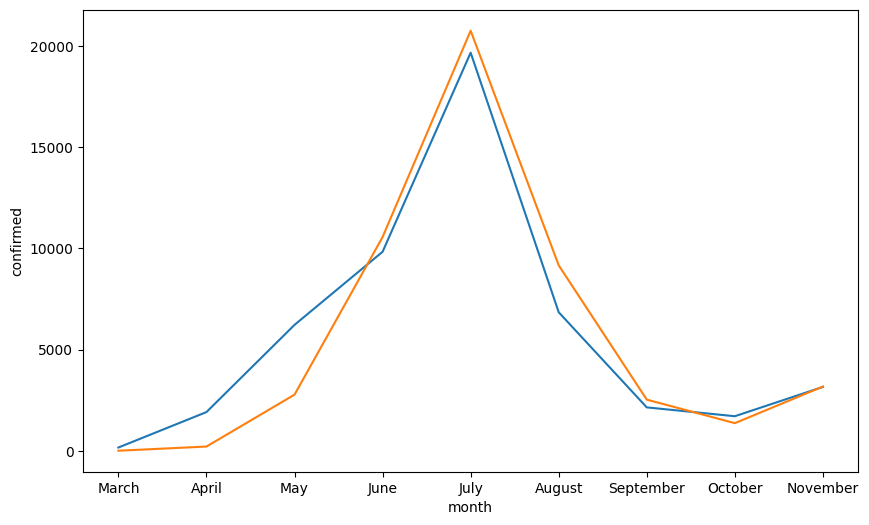

In [88]:
plt.figure(figsize=(10,6))
sns.lineplot(month, x="month", y="confirmed")
sns.lineplot(month, x="month", y="recovered")
plt.show()

lets do same for the countries

In [53]:
last_dates.columns

Index(['confirmed', 'recovered', 'death', 'date', 'cumulative_confirmed ',
       'cumulative_recovered', 'cumulative_death', 'active_cases', 'month'],
      dtype='object')

In [54]:
last_dates = last_dates.rename(columns={
    'cumulative_confirmed ': 'cumulative_confirmed'
})

lets compare confirmed versus the recovered cummulative figures ove the month

In [55]:
confirmed_v_recovered = last_dates[["month","cumulative_confirmed","cumulative_recovered"]]
confirmed_v_recovered

,month,cumulative_confirmed,cumulative_recovered
0,March,161,3
1,April,2074,212
2,May,8297,2986
3,June,18134,13550
4,July,37812,34313
5,August,44658,43478
6,September,46803,46006
7,October,48511,47372
8,November,51667,50547


#### analysis for Ghana over the years

In [54]:
years = reported_df.groupby(["year"])[["no_of_cases","no_of_deaths"]].sum().reset_index()
years.year = years.year.astype(str)
years

,year,no_of_cases,no_of_deaths
0,2000,5279182,21419
1,2001,5534764,26162
2,2002,5335247,70683
3,2003,8243454,91247
4,2004,9389638,87926
5,2005,11170319,76842
6,2006,11898896,78995
7,2007,13365529,76904
8,2008,13395349,87024
9,2009,17454477,115694


#### top twenty countries with most incidences per 1000

In [101]:
# Sort countries by number of cases and take the top 20
incidence_countries = incidence_df[incidence_df["year"]==2018][["country","no_of_cases"]][::-1]
incidence_countries.sort_values("no_of_cases",ascending=False).head(20)

,country,no_of_cases
78,Rwanda,486
13,Burkina Faso,398
59,Mali,386
8,Benin,386
55,Liberia,361
68,Niger,356
18,Central African Republic,347
25,Côte d'Ivoire,330
82,Sierra Leone,320
27,Democratic Republic of the Congo,319


In [105]:
incidence_gh_years = incidence_df[incidence_df["country"]=="Ghana"][["year","no_of_cases"]][::-1]
incidence_gh_years.year = incidence_gh_years.year.astype(str)

## Visualisation

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

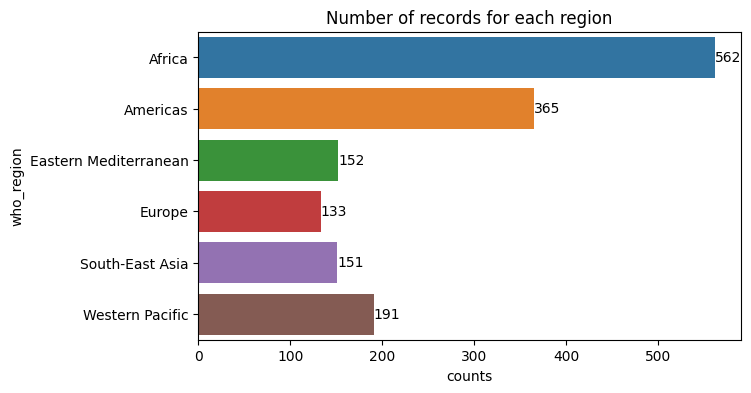

In [32]:
regions1 = reported_df.groupby(["who_region"]).size().reset_index(name="counts")

plt.figure(figsize=(7, 4))
fig = sns.barplot(data=regions1,
             y="who_region",x="counts", 
             hue="who_region")
# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar, fmt='%d')
fig.set_title("Number of records for each region")
plt.show()

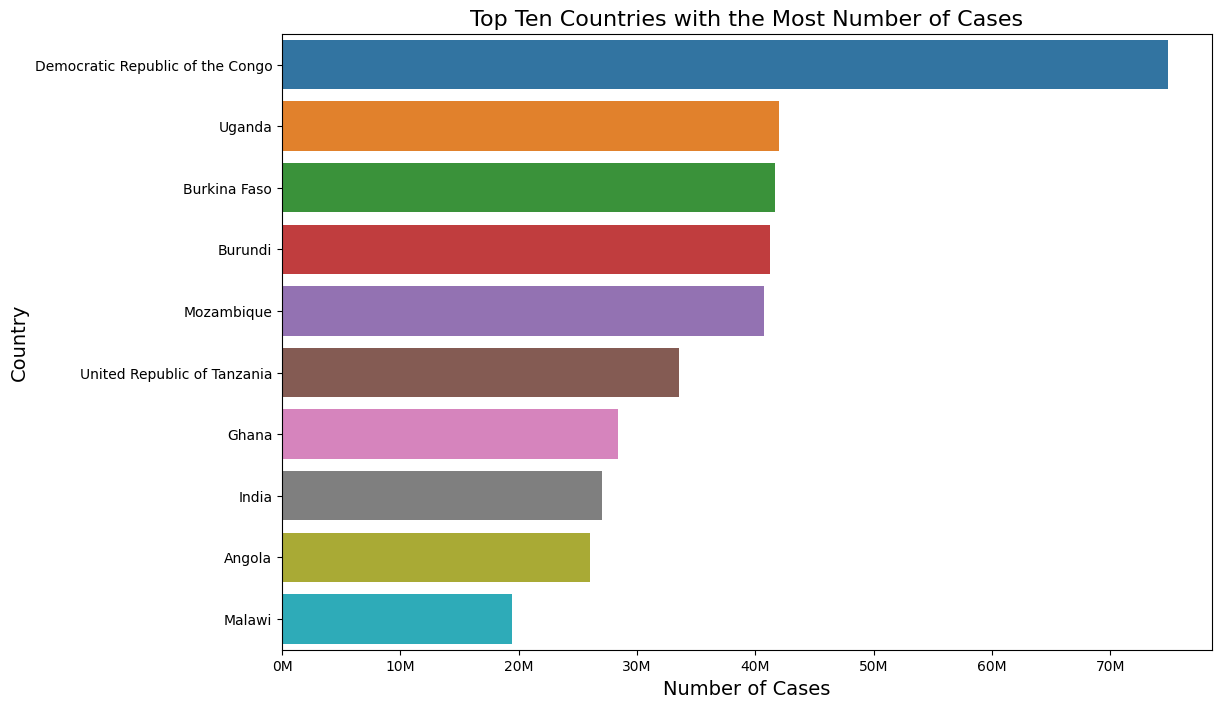

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_cases", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12, 8))

# Create the barplot
fig = sns.barplot(data=countries1, y="country", x="no_of_cases", hue="country")

# Format the x-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title and labels
fig.set_title("Top Ten Countries with the Most Number of Cases", fontsize=16)
fig.set_xlabel("Number of Cases", fontsize=14)
fig.set_ylabel("Country", fontsize=14)

# Display the plot
plt.show()


#### Records for Each Region

#### Top Ten Countries with the most number of cases

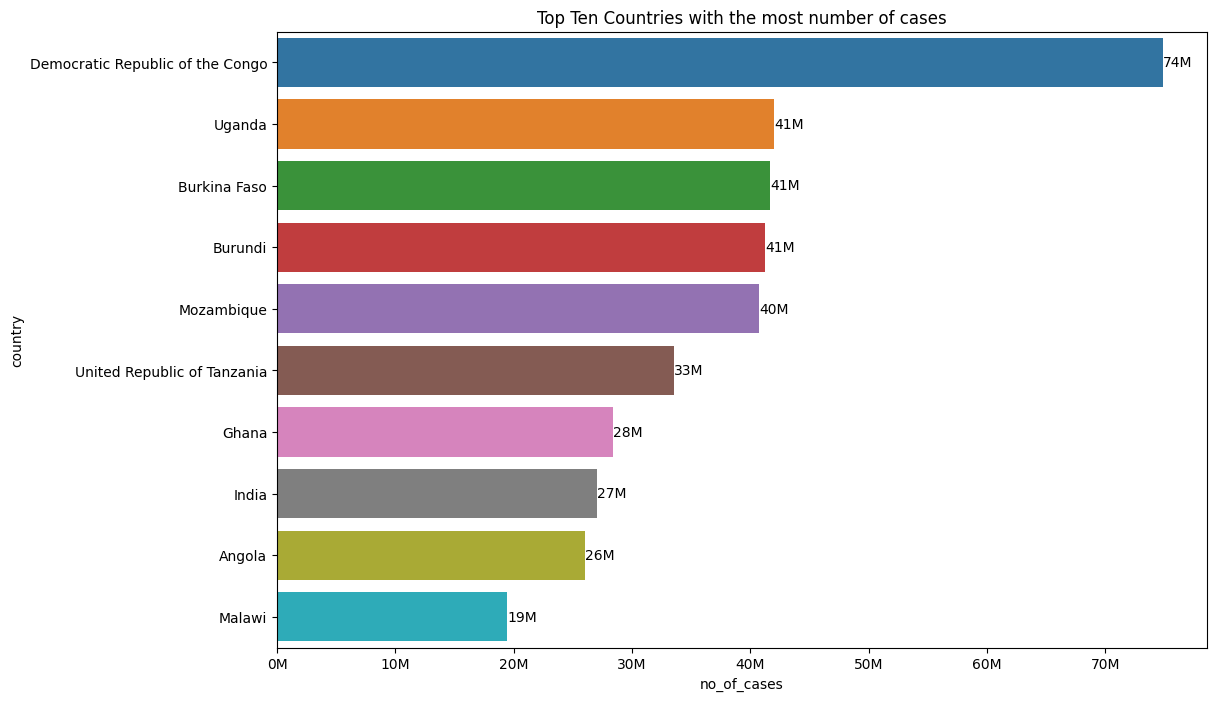

In [47]:
# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_cases", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12,8))

# Create the barplot
fig = sns.barplot(data=countries1,
             y="country",x="no_of_cases", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d", labels=[f'{int(val/1_000_000)}M' for val in bar.datavalues])

# Format the x-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'
fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Top Ten Countries with the most number of cases")

# Display the plot
plt.show()

#### Top Ten Countries with the most number of Deaths

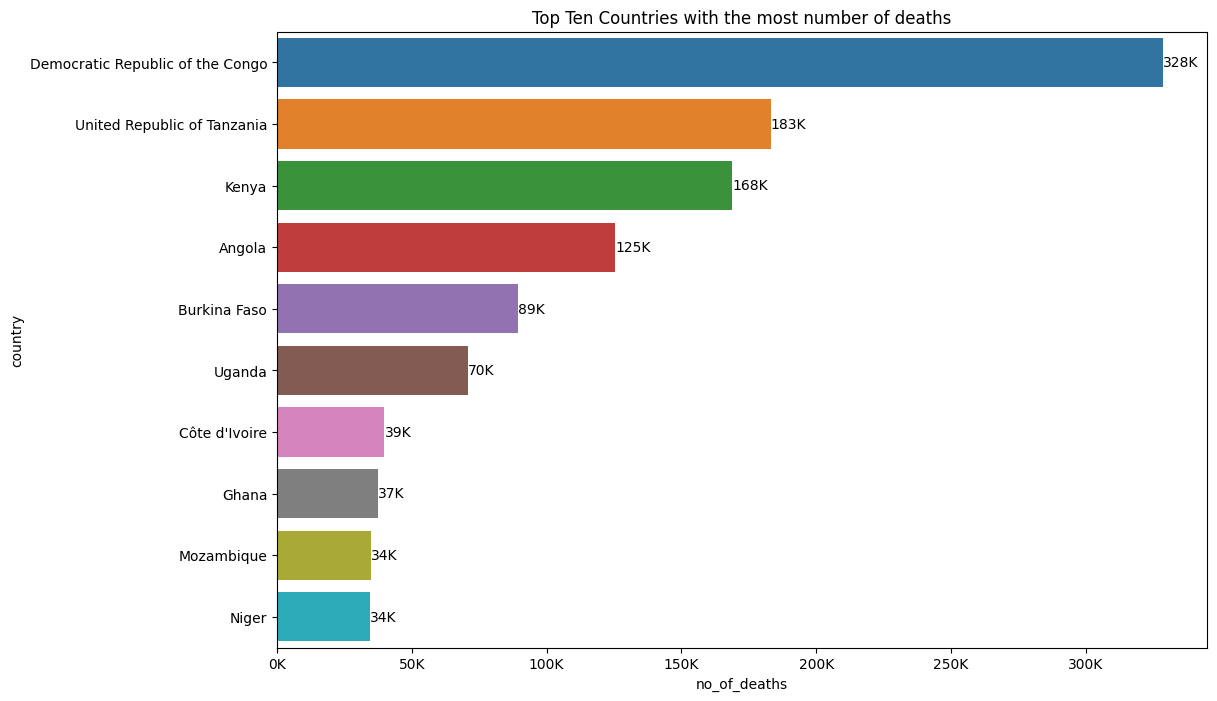

In [107]:
# Sort countries by number of cases and take the top 10
countries1 = countries.sort_values("no_of_deaths", ascending=False).head(10)

# Set plot size
plt.figure(figsize=(12,8))

# Create the barplot
fig = sns.barplot(data=countries1,
             y="country",x="no_of_deaths", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d", labels=[f'{int(val/1_000)}K' for val in bar.datavalues])

# Format the x-axis labels to display in thousands (e.g., 10K, 20K)
def millions_formatter(x, pos):
    return f'{int(x / 1_000)}K'
fig.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Top Ten Countries with the most number of deaths")

# Display the plot
plt.show()

#### Data over the years

##### Malaria Cases over the years

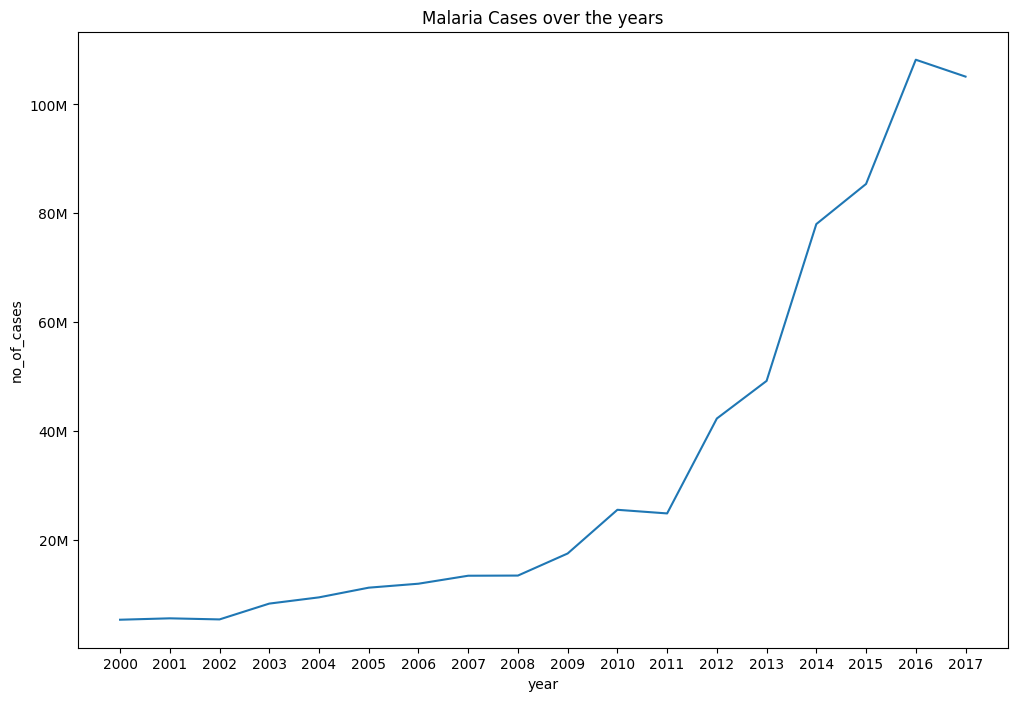

In [59]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(years, x = "year", y = "no_of_cases")

# Format the y-axis labels to display in millions (e.g., 10M, 20M)
def millions_formatter(y, pos):
    return f'{int(y / 1_000_000)}M'
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Malaria Cases over the years")

# Display the plot
plt.show()

##### Malaria Deaths over the years

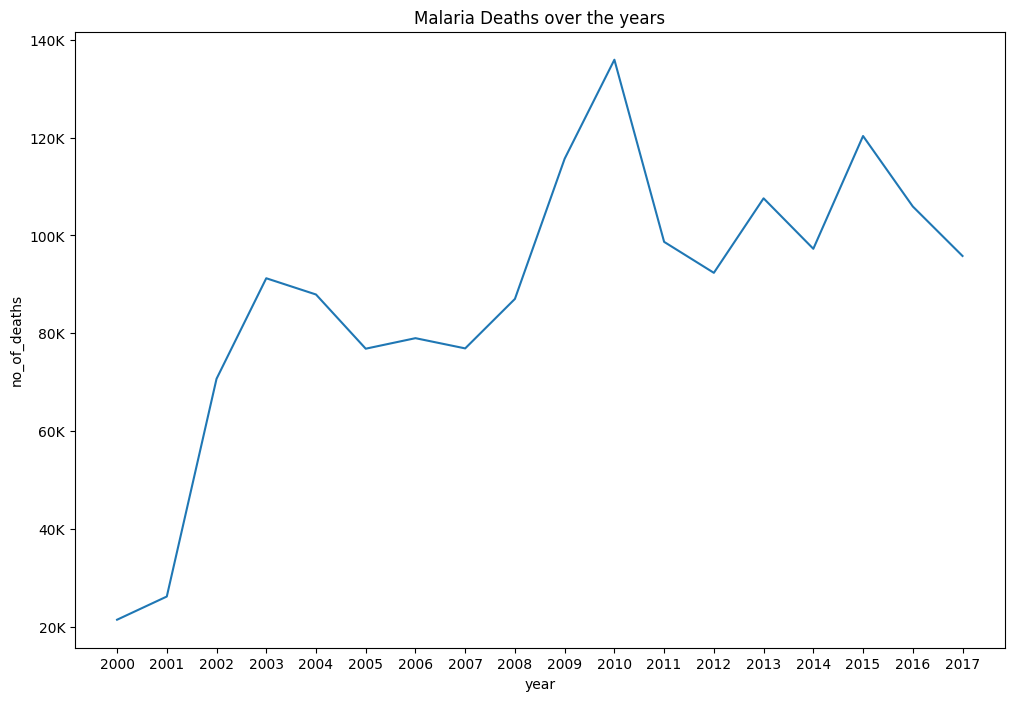

In [64]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(years, x = "year", y = "no_of_deaths")

# Format the y-axis labels to display in thousand (e.g., 10K, 20K)
def millions_formatter(y, pos):
    return f'{int(y / 1_000)}K'
fig.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add title
fig.set_title("Malaria Deaths over the years")

# Display the plot
plt.show()

the idea 

## LETS BASE OUR ANALYSIS ON Ghana

we'll work with the incidence per 1000 dataset

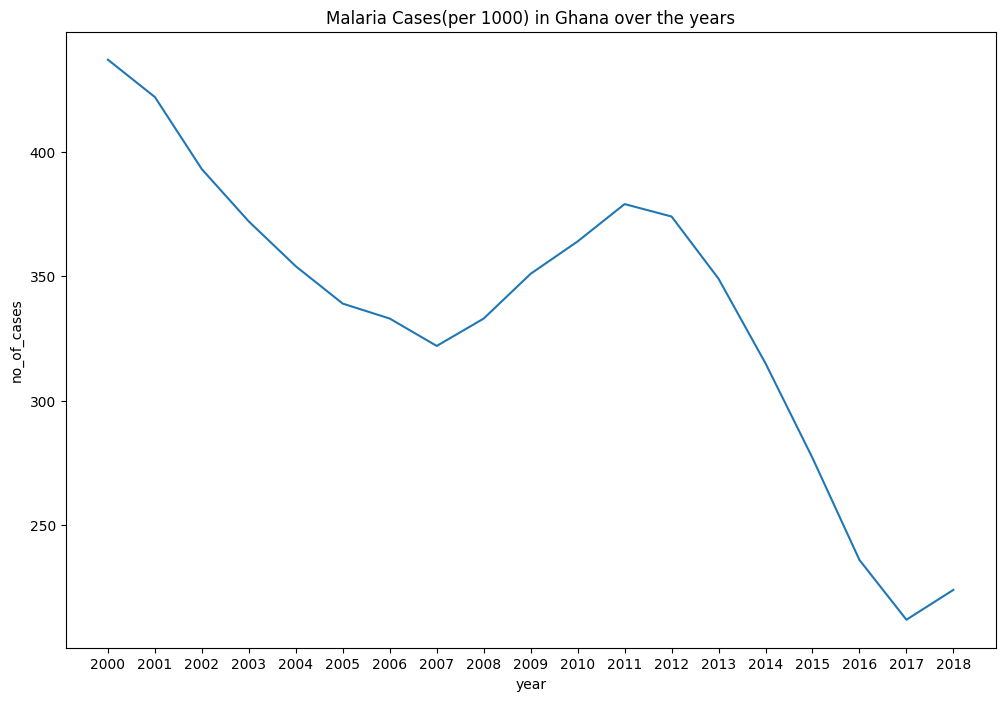

In [104]:
# Set plot size
plt.figure(figsize=(12,8))

# Create the lineplot
fig = sns.lineplot(incidence_gh_years, x = "year", y = "no_of_cases")

# Add title
fig.set_title("Malaria Cases(per 1000) in Ghana over the years")

# Display the plot
plt.show()

we can see a gradual but stead decline in malaria cases from 2000 to 2018

lets check to see if Ghana was in the top ten list of malaria incidences in 2018

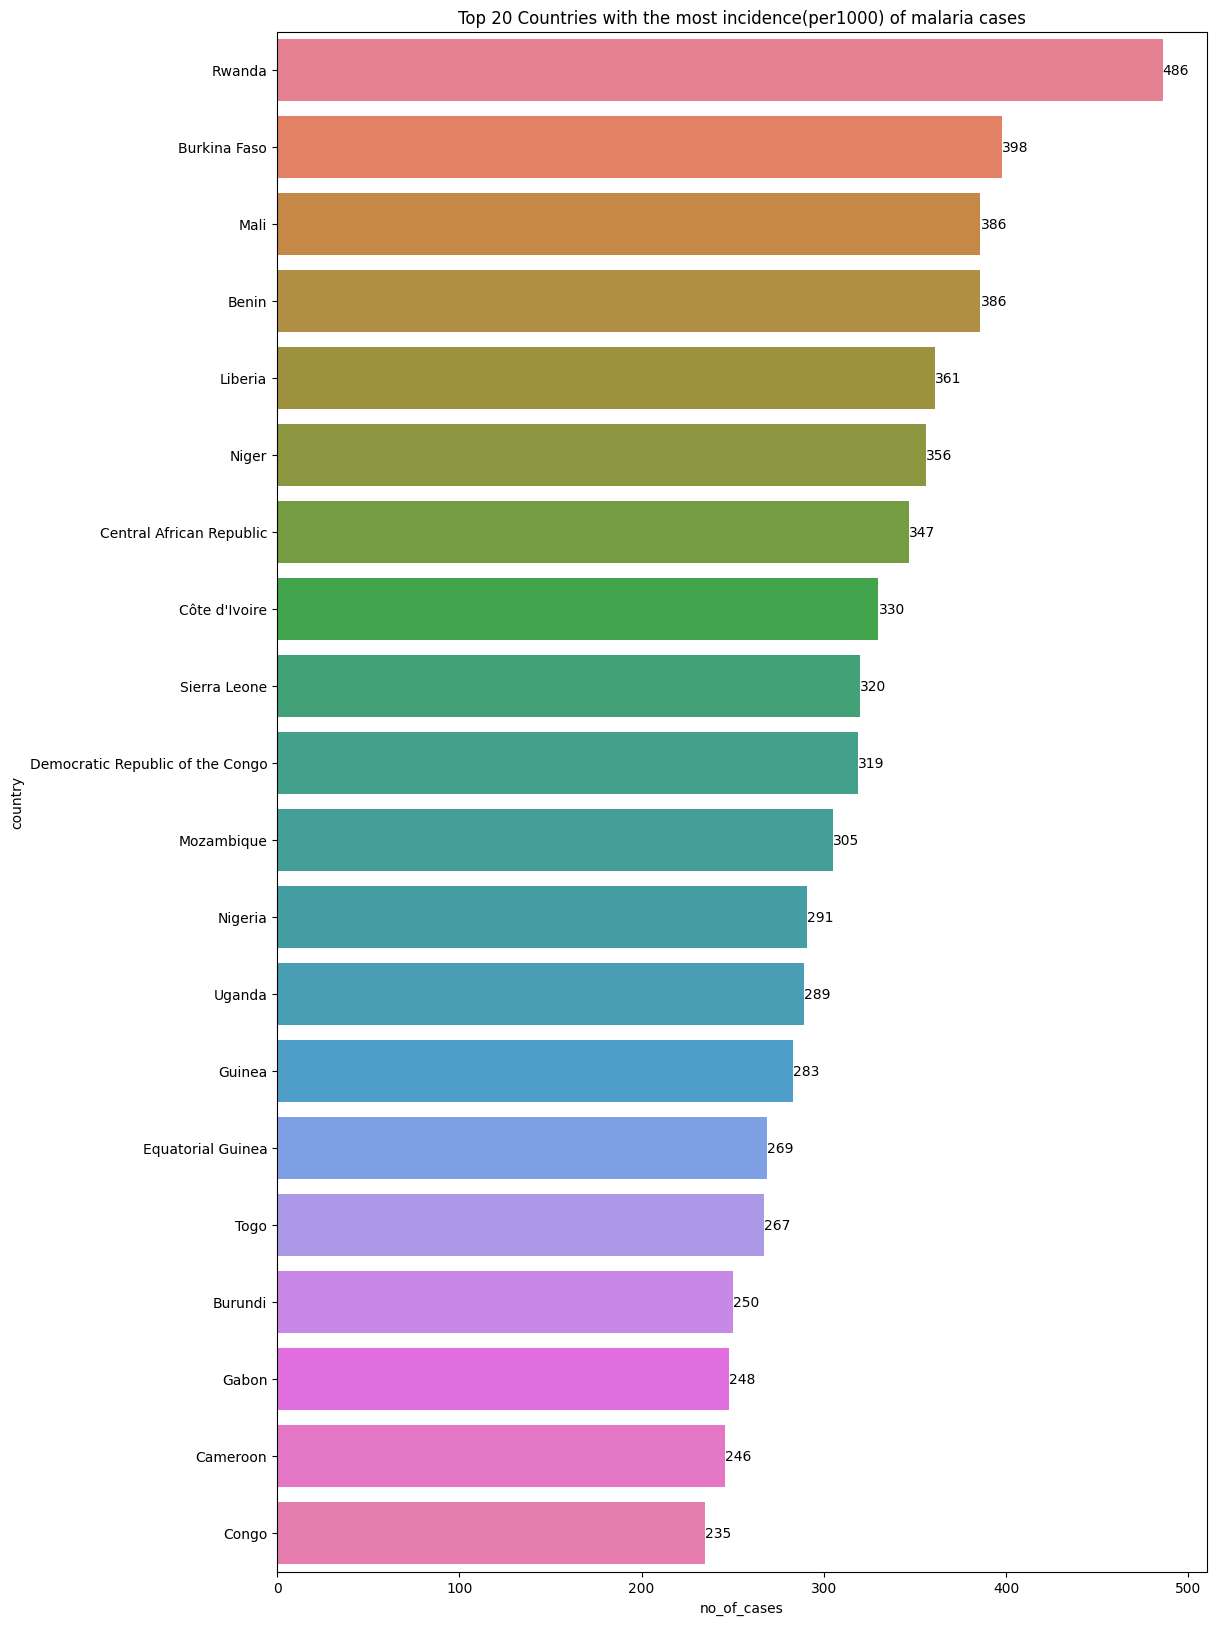

In [106]:
# Set plot size
plt.figure(figsize=(12,20))

# Create the barplot
fig = sns.barplot(data=incidence_countries,
             y="country",x="no_of_cases", hue="country")

# Add values (annotations) inside the bars
for bar in fig.containers:
    fig.bar_label(bar,fmt="%d")

# Add title
fig.set_title("Top 20 Countries with the most incidence(per1000) of malaria cases")

# Display the plot
plt.show()
